Para optimizar el valor de los parámetros del modelo creamos una función que calcule el **tamaño** del desajuste a los datos de los posibles modelos. Esta función recive los datos y valores válidos de parámetros del modelo y retorna la norma del residuo. Podemos usar por ejemplo la medida de desajuste de mínimos cuadrados (norma Euclidiana). Luego usamos una librería de optimización para calcular el valor del parámetro óptimo aproximado.
 
Consideremos el ejemplo siguiente donde tenemos datos del crecimiento de un tumor en ratones. 
Los datos son tomados (y mas información) se encuentran en: 
Modeling Cancer Growth with Differential Equations de Jue Wang, Department of Mathematics
Union College, Schenectady NY 12308 USA.
 
Para ilustrar el procedimiento, ajustaremos dos modelos:
1. Un modelo polinomial de grado uno
2. Un modelo polinomial cúbico
3. Un modelo de redes neuronales artificiales
4. Un modelo de ecuaciones diferenciales (Modelo de von Bertalanffy).


# Prerrequisitos y datos

In [ ]:
import numpy as np 
import scipy.optimize as op
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
Datos=np.array([[3.46,0.0158],[4.58,0.0264],[5.67,0.0326],[6.64,0.0445], [7.63,	0.0646],\
[8.41,	0.0933],[9.32,	0.1454],[10.27,	0.2183],[11.19,	0.2842],[12.39,	0.4977],[13.42,	0.6033],\
[15.19,	0.8441],[16.24	,1.2163],[17.23,	1.447],[18.18,	2.3298],[19.29,	2.5342],[21.23	,3.0064],\
[21.99	,3.4044],[24.33,	3.2046],[25.58,	4.5241],[26.43,	4.3459],[27.44,	5.1374],[28.43	,5.5376],\
[30.49	,4.8946],[31.34,	5.066],[32.34	,6.1494],[33.00	,6.8548],[35.20,	5.9668],[36.34	,6.6945],\
[37.29	,6.6395],[38.50	,6.8971],[39.67	,7.2966],[41.37	,7.2268],[42.58,	6.8815],[45.39,	8.0993],\
[46.38	,7.2112],[48.29,	7.0694],[49.24	,7.4971],[50.19,	6.9974],[51.14,	6.7219],[52.10,	7.0523],\
[54.00,	7.1095],[56.33	,7.0694],[57.33,	8.0562],[59.38 ,	7.2268]])

tiempo=Datos[:,0]
Volumen=Datos[:,1]

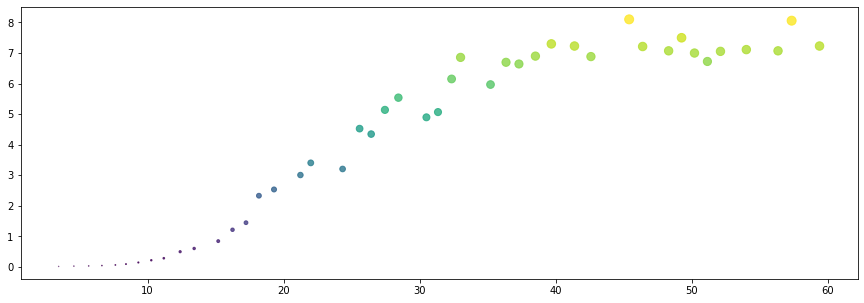

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(tiempo,Volumen,s=10*Volumen, c=Volumen, alpha=0.8)
plt.show()

# Modelo polinomio grado 1
El modelo cúbico asumimos que 
$$
V(t) \approx a+bt
$$
y queremos estimar $a,b,c$ y $d$.

Creamos una función que mida la norma del residuo, o sea, el tamaño del desajuste (o tamaño del residuo) del modelo polinomial cúbico con respecto a los datos usando, por ejemplo, mínimos cuadrados, es decir, la norma euclidiana de la diferencia o residuo.

In [ ]:
def residuoPL(par,V,tiempo):
  a,b=par
  Vmodelo=a+b*tiempo
#  print(Vmodelo.shape)
#  print(V.shape)
  res=V-Vmodelo;
  nres=np.linalg.norm(res)
  #print(nres)
  return nres

Por ejemplo, el desajuste de usar $a=1$ y $b=2$, es defir, aproximar $V(t)≈1+2t$ es $\approx 424.31$ que es calculado a continuación.

In [ ]:
residuoPL([1,0.1],Volumen,tiempo)

9.988729515809302

Ahora usamos una librería de optimización para calcular el valor del parámetro óptimo aproximado. Usamos scypy.optimize, en particular el optimizador 
scypy.optimize.minimize, https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html. Los argumentos principales de minimize, son la función a minimizar y un valores de los parámetros para iniciar la busqueda del valor óptimo aproximado.

In [ ]:
optimoPL=op.minimize(residuoPL,[1,.1], args=(Volumen,tiempo),method='Powell')
parametro_optimoPL=optimoPL.x
print(optimoPL)

   direc: array([[ 0.        ,  1.        ],
       [-1.51097459,  0.03909199]])
     fun: 6.307243158161712
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 3
  status: 0
 success: True
       x: array([-0.70195908,  0.16773982])


El modelo entrenado es $V(t)\approx -0.70+0.17t$.
Después de calcular el valor del parámetro óptimo podemos mostrar el ajuste final de nuestro modelo.

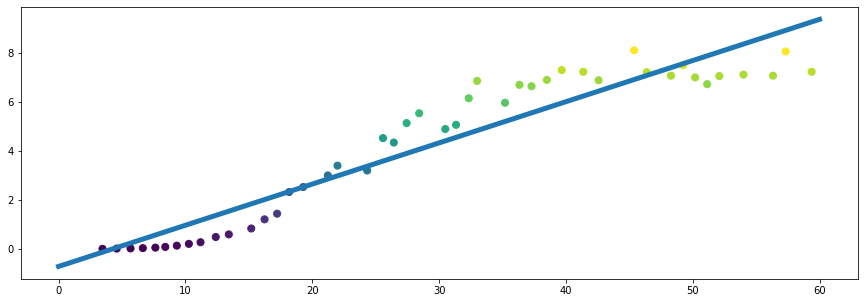

In [ ]:
ts=np.linspace(0, 60, 1000) 
V0=0.0158
a,b=parametro_optimoPL
VolumenPL=a+b*ts
plt.figure(figsize=(15,5))
plt.scatter(tiempo,Volumen,s=50, c=Volumen)
plt.plot(ts,VolumenPL,linewidth=5)
plt.show()

# Modelo polinomio cúbico 

El modelo cúbico asumimos que 
$$
V(t) \approx a+bt+ct^2+dt^3
$$
y queremos estimar $a,b,c$ y $d$.

Creamos una función que mida la norma del residuo, o sea, el tamaño del desajuste (o tamaño del residuo) del modelo polinomial cúbico con respecto a los datos usando, por ejemplo, mínimos cuadrados, es decir, la norma euclidiana de la diferencia o residuo.

In [ ]:
def residuoPC(par,V,tiempo):
  a,b,c,d=par
  Vmodelo=a+b*tiempo+c*np.power(tiempo,2)+d*np.power(tiempo,3)
#  print(Vmodelo.shape)
#  print(V.shape)
  res=V-Vmodelo;
  nres=np.linalg.norm(res)
  #print(nres)
  return nres

Por ejemplo, el desajuste de usar $a=1, b=2, c=3$ y $d=4$ es:

In [ ]:
residuoPC([1,2,3,4],Volumen,tiempo)

2097512.575338375

Ahora usamos una librería de optimización para calcular el valor del parámetro óptimo aproximado.

In [ ]:
optimoPC=op.minimize(residuoPC,[0.1,.1,.1,.1], args=(Volumen,tiempo),method='Powell')
parametro_optimoPC=optimoPC.x
print(optimoPC)

   direc: array([[ 8.65040672e+01, -1.71855296e+01,  6.72398743e-01,
        -7.31470801e-03],
       [ 4.19158472e+03, -4.41443017e+01, -5.60515662e-01,
        -6.73757149e-03],
       [-3.20775309e+03,  2.34087257e+02, -1.46053687e+00,
        -3.91840502e-02],
       [ 1.64068582e-01, -2.08960894e-02,  7.69936097e-04,
        -7.86584177e-06]])
     fun: 3.2412248820163145
 message: 'Optimization terminated successfully.'
    nfev: 664
     nit: 11
  status: 0
 success: True
       x: array([-8.16542962e-01,  5.42859220e-02,  8.36149889e-03, -1.21019606e-04])


Después de calcular el valor del parámetro óptimo podemos mostrar el ajuste final de nuestro modelo.

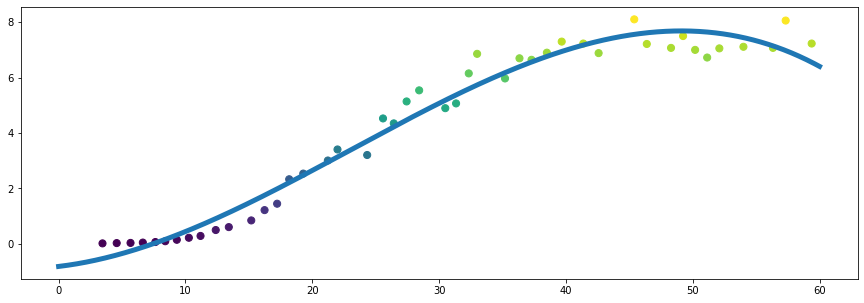

In [ ]:
ts=np.linspace(0, 60, 1000) 
V0=0.0158
a,b,c,d=parametro_optimoPC
VolumenPC=a+b*ts+c*np.power(ts,2)+d*np.power(ts,3)
plt.figure(figsize=(15,5))
plt.scatter(tiempo,Volumen,s=50, c=Volumen)
plt.plot(ts,VolumenPC,linewidth=5)
plt.show()

# Modelo de redes neuronales artificiales


El modelo cúbico asumimos que 
$$
V(t) \approx a\frac{1}{1+e^{bt+ c}}+d\frac{1}{1+e^{ft+g}}
$$
y queremos estimar $a,b,c,d,f$ y $g$.

Creamos una función que mida la norma del residuo, o sea, el tamaño del desajuste (o tamaño del residuo) del modelo polinomial cúbico con respecto a los datos usando, por ejemplo, mínimos cuadrados, es decir, la norma euclidiana de la diferencia o residuo.

In [ ]:
def residuoNN(par,V,tiempo):
  a,b,c,d,f,g=par
  t=tiempo
  Vmodelo=a*( 1/ (1+np.exp(b*t+c)  ))+d*( 1/ (1+np.exp(f*t+g)  ))
#  print(Vmodelo.shape)
#  print(V.shape)
  res=V-Vmodelo;
  nres=np.linalg.norm(res)
  #print(nres)
  return nres

Por ejemplo, el desajuste de usar $a=1, b=2, c=3$,  $d=4$, $f=1$ y $g=0$ es:

In [ ]:
residuoNN([1,2,3,4,1,0],Volumen,tiempo)

34.479958323663645

Después de calcular el valor del parámetro óptimo podemos mostrar el ajuste final de nuestro modelo.

In [ ]:
optimoPC=op.minimize(residuoNN,[0.1,.1,.1,.1,1,0], args=(Volumen,tiempo),method='Powell')
parametro_optimoPC=optimoPC.x
print(optimoPC)

   direc: array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.41253084e-01,  2.65388760e-04, -1.14403489e-01,
        -1.12066768e+01, -1.00644012e-02,  1.22272193e-01],
       [-1.43082977e+00, -2.53651183e-02,  2.47108639e-01,
         2.99947902e+01, -5.63664664e-01,  1.47702510e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 5.21510055e-02,  8.87300266e-05, -1.42986066e-02,
        -1.77484813e+00, -2.08636258e-03,  3.07385737e-02]])
     fun: 3.5264010316053285
 message: 'Optimization terminated successfully.'
    nfev: 917
     nit: 11
  status: 0
 success: True
       x: array([ 8.43875529e+00, -9.55278159e-02,  1.97213303e+00, -6.53385733e+01,
        3.18243445e-02,  3.28443135e+00])


$$
V(t) \approx 8.43\frac{1}{1+e^{(-9.5e-02)t+ 1.97}}-65\frac{1}{1+e^{(3.1e-02)t+3.28}}
$$

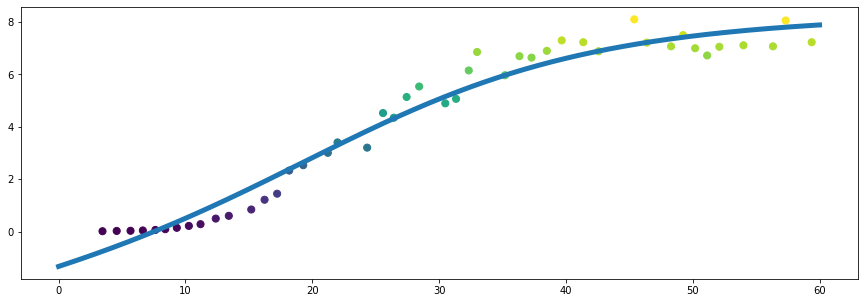

In [ ]:
ts=np.linspace(0, 60, 1000) 
V0=0.0158
a,b,c,d,f,g=parametro_optimoPC
VolumenNN=a*( 1/ (1+np.exp(b*ts+c)  ))+d*( 1/ (1+np.exp(f*ts+g)  ))
plt.figure(figsize=(15,5))
plt.scatter(tiempo,Volumen,s=50, c=Volumen)
plt.plot(ts,VolumenNN,linewidth=5)
plt.show()

# Modelo de ecuaciones diferenciales
Considere el modelo de ecuaciones diferenciales, 
$$
V'= aV^\frac{2}{3}-bV,
$$
con $V_0=V(0)$ dado. La variable $V$ representa o aproxima el volumen del tumor en el tiempo $t$.

In [ ]:
# Modelo de Bertalanffy
def modeloBF(V, t, par):
  a,b=par
  dV=a*np.power(V, 2/3)-b*V;
  return dV


def residuoBF(par,V,tiempo):
  V0=0.0158
  VolumenSimulado=odeint(modeloBF, V0, tiempo, args=(par,))
  VS=VolumenSimulado.transpose()
  res=V-VS;
  nres=np.linalg.norm(res)
  #print(nres)
  return nres

La función residuo arriba mide el desajuste (o tamaño del residuo) de la simulación de la EDO con respecto a los datos usando mínimos cuadrados, es decir, la norma euclidiana de la diferencia o residuo. 
**Asumimos que nuestro modelo de observación mide directamente el tamaño del tumor.  Es decir, el desajuste se mide directamente con la diferencia del modelo contra los datos.**


Por ejemplo el desajuste de usar $a=1$ y $b=1$ en el modelo es de:


In [ ]:
residuoBF([1,1],Volumen,tiempo)


29.11640743560965

Ahora usamos una librería de optimización para calcular el valor del parámetro óptimo aproximado.

In [ ]:
optimo=op.minimize(residuoBF,[1,1], args=(Volumen,tiempo), method='Nelder-Mead')
parametro_optimo=optimo.x
print(optimo)

 final_simplex: (array([[0.40115733, 0.19711753],
       [0.40108573, 0.19706832],
       [0.40120756, 0.19714372]]), array([3.56902916, 3.5690299 , 3.56903015]))
           fun: 3.569029162397135
       message: 'Optimization terminated successfully.'
          nfev: 94
           nit: 49
        status: 0
       success: True
             x: array([0.40115733, 0.19711753])


 
Después de calcular el valor del parámetro óptimo podemos mostrar el ajuste final de nuestro modelo. 


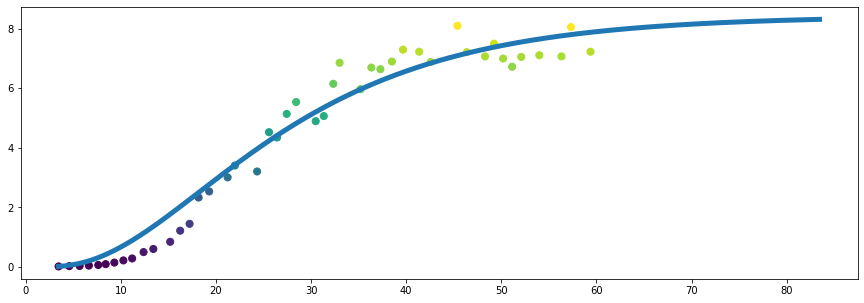

In [ ]:
tiempo_simulacion=3.46+np.linspace(0, 80, 1000) 
V0=0.0158
VolumenBF=odeint(modeloBF, V0, tiempo_simulacion, args=(parametro_optimo,))
plt.figure(figsize=(15,5))
plt.scatter(tiempo,Volumen,s=50, c=Volumen)
plt.plot(tiempo_simulacion,VolumenBF,linewidth=5)
plt.show()

# Problemas

**1.** Considere el modelo polinomial de grado 1 y 3. Proponga un modelo polinomial de grado 4. Escriba las rutinas necesarias para optimizar los valores de los parámetros de este modelo de grado 4. Muestre el ajuste obtenido. Intente con diferentes valores iniciales de los parámetros y seleccione los valores calculados que arrojen un menor valor del residuo. Puede usar listas e índices para la identificación de los parámetros. 
 
**2.** Considere ahora el modelo de redes neuronales artificiales presentado arriba. Esta red neuronal artificial tiene una capa y dos neuronas. Agregue una tercera neurona.  Escriba las rutinas necesarias para optimizar los valores de los parámetros de este modelo con tres neuronas. Muestre el ajuste obtenido. Intente con diferentes valores iniciales de los parámetros y seleccione los valores calculados que arrojen un menor valor del residuo. Puede usar listas e índices para la identificación de los parámetros. 

**3** Construya, para un conjunto de datos seleccionados, un modelo que considere adecuado y ajuste los valores de los parámetros. Es decir, repita el ejercicio arriba para otro conjunto de datos. 
Puede usar librerías de aprendizaje de máquina, de interpolación o de ajustes diferentes a las mostradas en clase. Por ejemplo, puede usar los datos de la tabla anexa (https://saludata.saludcapital.gov.co/osb/index.php/datos-de-salud/enfermedades-trasmisibles/ocupacion-ucis/). 


|Fecha |Camas UCI Covid-19|
|---|---|
|1/01/2022| 222|
|2/01/2022| 209|
|3/01/2022|217|
|4/01/2022| 245|
|5/01/2022| 252|
|6/01/2022| 278|
|7/01/2022| 291|
|8/01/2022| 299|
|9/01/2022| 302|
|10/01/2022| 292|
|11/01/2022| 311|
|12/01/2022| 306|
|13/01/2022| 326|
|14/01/2022| 332|
|15/01/2022| 368|
|16/01/2022| 356|
|17/01/2022| 373|
|18/01/2022| 397|
|19/01/2022| 410|
|20/01/2022| 431|

Puede usar los modelos vistos en clase y algunos adicionales como


$$y=A\frac{1}{x}+B$$
$$y=\frac{D}{x+C}$$
$$y=\frac{x}{Ax+B}$$
$$y=Ce^{Ax}$$
$$y=Cx^A$$
$$y=(Ax+b)^{-2}$$
$$y=Cxe^{-Dx}$$
$$y=\frac{L}{1+Ce^{Ax}}$$

entre otros. 